In [1]:
from pathlib import Path

# Get the current working directory as a Path object
current_path = Path.cwd()
home_folder = 'evan_home'

# Traverse up the directory tree until you find the target folder
for parent in [current_path] + list(current_path.parents):
    if parent.name == home_folder:
        home_path = parent
        break
else:
    raise ValueError(f"Folder '{home_folder}' not found in the current working directory.")

print("Home Path:", home_path)
source_code_dir = home_path / 'Source_code'
dataset_dir = home_path / 'Dataset'


Home Path: c:\Users\evanlee\Documents\Bmi_NAS_evan\evan_home


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import scanpy as sc

In [3]:
# adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\PBMC_Hao\GSE164378_Hao\Harmony_noZ\Hao_Harmony_test_no_scale.h5ad")
# adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/PBMC_Hao/GSE164378_Hao/Harmony_noZ/Hao_Harmony_test_no_scale.h5ad')
adata = sc.read_h5ad(dataset_dir / 'PBMC_Hao/GSE164378_Hao/Harmony_noZ/Hao_Harmony_test_no_scale.h5ad')

print('Original adata:', adata.shape)
adata.obs['celltype.l1'] = adata.obs['celltype.l1'].str.replace(' ', '_')
label = adata.obs['celltype.l1'].tolist()
types = np.unique(label).tolist()
adata.obs.head()

Original adata: (161764, 33538)


,celltype.l1,celltype.l2,celltype.l3,Batch,donor,time,lane,Phase,nCount_ADT,nFeature_ADT,nCount_RNA,nFeature_RNA,leiden
L1_AAACCCAAGAAACTCA,Mono,CD14 Mono,CD14 Mono,Batch1,P2,7,L1,G1,7535,217,10823,2915,4
L1_AAACCCAAGACATACA,CD4_T,CD4 TCM,CD4 TCM_1,Batch1,P1,7,L1,G1,6013,209,5864,1617,2
L1_AAACCCACAACTGGTT,CD8_T,CD8 Naive,CD8 Naive,Batch1,P4,2,L1,S,6620,213,5067,1381,5
L1_AAACCCACACGTACTA,NK,NK,NK_2,Batch1,P3,7,L1,G1,3567,202,4786,1890,3
L1_AAACCCACAGCATACT,CD8_T,CD8 Naive,CD8 Naive,Batch1,P4,7,L1,G1,6402,215,6505,1621,5


## l1: LR stratified KFold

In [4]:
l1_LR_metric = pd.read_csv('LR_metrics_L1_k3_stratifiedKF.csv', index_col=0)
l1_LR_metric.head()

,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC,MCC
B,0.999621,0.998188,0.997373,0.997780,0.999987,0.999837,0.997573
CD4_T,0.969910,0.940597,0.940703,0.940645,0.994097,0.982792,0.920496
CD8_T,0.975736,0.945784,0.897325,0.920914,0.991723,0.968053,0.907036
DC,0.998509,0.970831,0.961686,0.966226,0.999859,0.994325,0.965481
Mono,0.993625,0.983889,0.995256,0.989540,0.998801,0.995464,0.984989


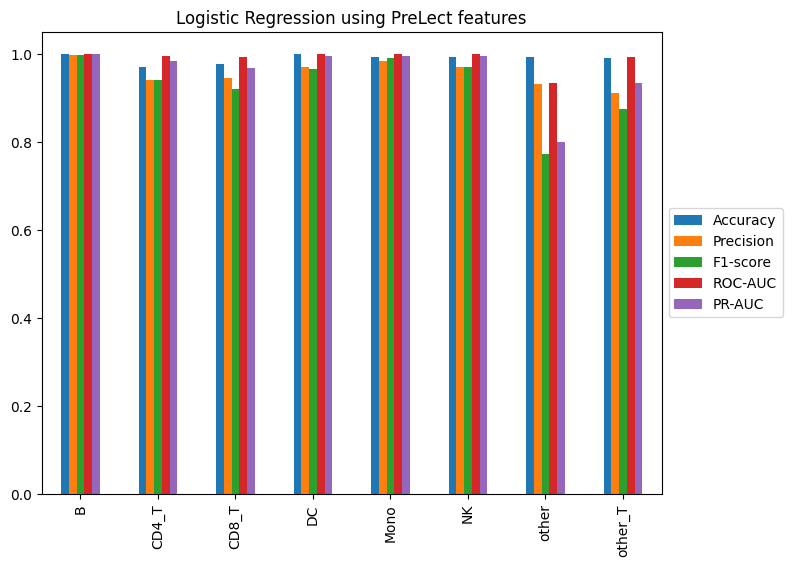

In [5]:
# All metrics
cols = ['Accuracy', 'Precision', 'F1-score', 'ROC-AUC', 'PR-AUC']
ax = l1_LR_metric[cols].plot.bar(rot=90, figsize=(8,6), title='Logistic Regression using PreLect features')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Text(0, 0.5, 'Counts')

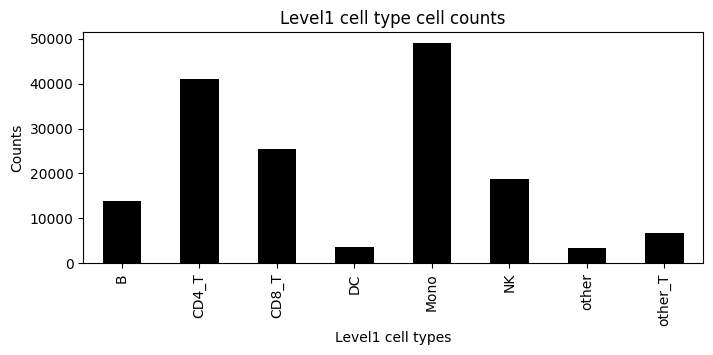

In [6]:
# cell number
adata.obs['celltype.l1'].value_counts().loc[types].plot.bar(rot=90, figsize=(8,3), title='Level1 cell type cell counts', color='black')
plt.xlabel('Level1 cell types')
plt.ylabel('Counts')

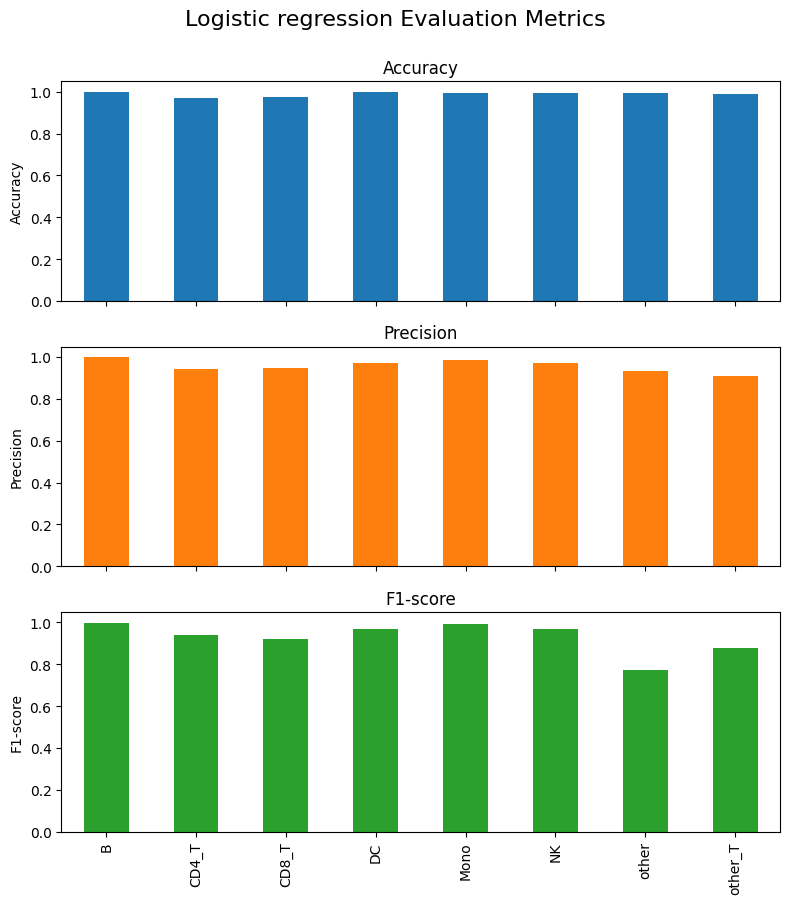

In [7]:
# accuracy
# Set up the figure for 3 vertically stacked subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 9))
colors = plt.cm.tab10.colors

# Plotting each metric in its own subplot as a bar plot, showing x-axis labels only on the bottom subplot
l1_LR_metric['Accuracy'].plot(kind='bar', ax=axes[0], color=colors[0])
axes[0].set_title('Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].tick_params(labelbottom=False)

l1_LR_metric['Precision'].plot(kind='bar', ax=axes[1], color=colors[1])
axes[1].set_title('Precision')
axes[1].set_ylabel('Precision')
axes[1].tick_params(labelbottom=False)

l1_LR_metric['F1-score'].plot(kind='bar', ax=axes[2], color=colors[2])
axes[2].set_title('F1-score')
axes[2].set_ylabel('F1-score')

# Ensure x-axis tick labels only show at the bottom subplot
axes[2].tick_params(labelbottom=True)

fig.suptitle('Logistic regression Evaluation Metrics', fontsize=16, y=1)
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

